## Import thư viện

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Problem/Customer_Segmentation

/content/drive/MyDrive/Problem/Customer_Segmentation


In [4]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Dataset/Customer Segmentation.zip","r") as zip_ref:
    zip_ref.extractall("Dataset")

In [5]:
import os
path_data = "/content/drive/MyDrive/Problem/Customer_Segmentation/Dataset/Customer Segmentation/"
checkPath = os.path.isdir(path_data)
checkFile = os.path.isfile(path_data + "E-Commerce Data.csv")
print("The path and file are valid or not :", checkPath, checkFile)

The path and file are valid or not : True True


## Read data

In [7]:
import pandas as pd
data = pd.read_csv(path_data + "E-Commerce Data.csv", encoding='cp1252')

print(data.shape)
print(data.index)
print(data.columns)

(541909, 8)
RangeIndex(start=0, stop=541909, step=1)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [8]:
display(data.head(5))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Analysis

### Kiểm tra bất thường của dữ liệu định lượng
IQR = Q3(75%) - Q1(25%)  
ConfidentRange = (Q1(25%) - 1.5*IQR, Q3(75%) - 1.5*IQR)

In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#Loc bo du lieu am
df = data[(data.Quantity > 0)]
df = df[(df.UnitPrice > 0)]

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


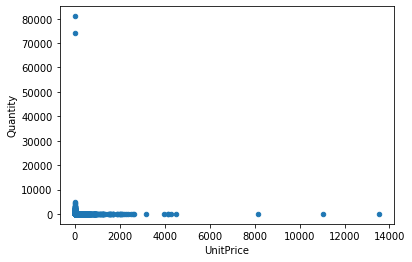

In [12]:
plot = df.plot.scatter('UnitPrice', 'Quantity')

In [13]:
#Loc outliers
df = df[(df.Quantity < 10000)]
df = df[(df.UnitPrice <5000)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530099.000000,530099.000000,397881.000000
mean,10.249336,3.845883,15294.426122
std,37.793649,24.260925,1713.140274
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,4800.000000,4505.170000,18287.000000


### Kiểm tra dữ liệu null, NaN

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530099 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530099 non-null  object 
 1   StockCode    530099 non-null  object 
 2   Description  530099 non-null  object 
 3   Quantity     530099 non-null  int64  
 4   InvoiceDate  530099 non-null  object 
 5   UnitPrice    530099 non-null  float64
 6   CustomerID   397881 non-null  float64
 7   Country      530099 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132218
Country             0
dtype: int64

In [16]:
df = df.dropna(how='any', axis ='rows')
df.shape

(397881, 8)

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df['TotalPrice'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [20]:
ord_cnty = df.groupby('Country')['TotalPrice'].sum()\
             .sort_values(ascending=False)
ord_cnty.head()

Country
United Kingdom    7054595.604
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalPrice, dtype: float64

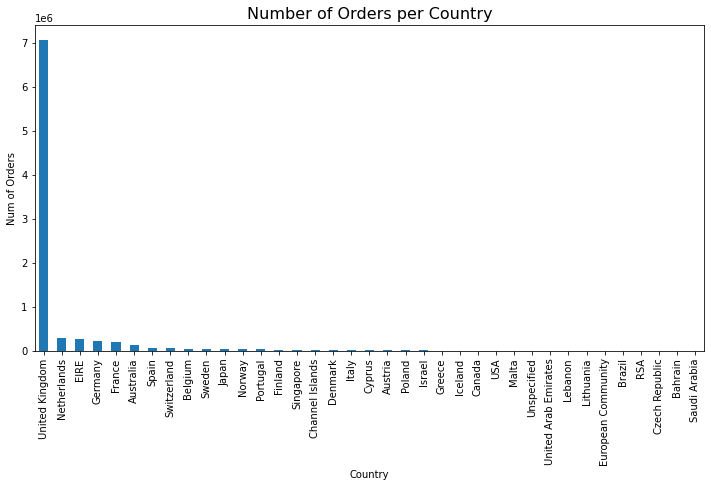

In [21]:
plt.figure(figsize=(12,6))
ord_cnty.plot.bar()
plt.ylabel("Num of Orders") #7 x 10^6
plt.xlabel("Country")
plt.title("Number of Orders per Country", fontsize=16)
plt.show()

In [23]:
dfg = df.groupby(by=['CustomerID'])['Quantity','TotalPrice']\
        .agg({'Quantity':'sum','TotalPrice':'sum'}).reset_index()
dfg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,CustomerID,Quantity,TotalPrice
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,631,1757.55
3,12350.0,197,334.40
4,12352.0,536,2506.04


In [24]:
dfg.rename(columns={'Quantity':'Total_Quantity','TotalPrice' : 'Total_Amount'},inplace=True)
dfg.head()

,CustomerID,Total_Quantity,Total_Amount
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,631,1757.55
3,12350.0,197,334.40
4,12352.0,536,2506.04


In [26]:
X = dfg.iloc[:,[1, 2]].values #: lay het
X

array([[2458.  , 4310.  ],
       [2341.  , 1797.24],
       [ 631.  , 1757.55],
       ...,
       [ 103.  ,  178.05],
       [1397.  , 2094.88],
       [1586.  , 1837.28]])

In [27]:
#Feature scaling
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

In [28]:
wcss=[] #cang nho thi du lieu cang dc chia nhom tot
for n_clusters in range(1,10):
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++',)
    #KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(X)

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

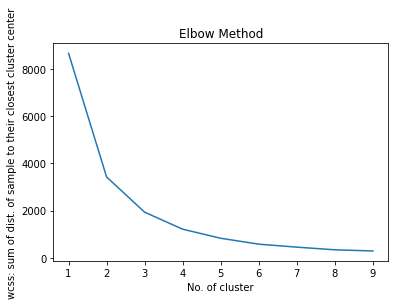

In [29]:
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )